In [20]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jul 22 11:28:08 2020

@author: vin
"""

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Flatten
import matplotlib.pyplot as plt
adam= tf.keras.optimizers.Adam(learning_rate=0.01)

In [21]:
(trainx,trainy),(testx, testy)=tf.keras.datasets.cifar100.load_data()
print("train shapes",trainx.shape,trainy.shape)
print("test shapes",testy.shape,testy.shape)

train shapes (50000, 32, 32, 3) (50000, 1)
test shapes (10000, 1) (10000, 1)


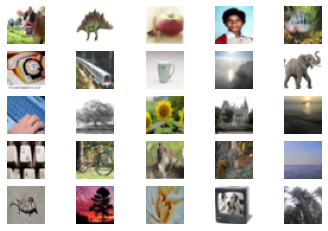

In [22]:
# label_class
classes = ['beaver',' dolphin',' otter',' seal',' whale',
'aquarium fish','flatfish',' ray',' shark',' trout', 
'orchids',' poppies',' roses',' sunflowers',' tulips', 
'bottles',' bowls',' cans',' cups',' plates',
'apples',' mushrooms',' oranges',' pears',' sweet peppers', 
'clock',' computer keyboard',' lamp',' telephone',' television',
'bed',' chair',' couch',' table',' wardrobe',
'bee',' beetle',' butterfly',' caterpillar',' cockroach',
'bear',' leopard',' lion',' tiger',' wolf',
'bridge',' castle',' house',' road',' skyscraper',
'cloud',' forest',' mountain',' plain',' sea', 
'camel',' cattle',' chimpanzee',' elephant',' kangaroo', 
'fox',' porcupine',' possum',' raccoon',' skunk', 
'crab',' lobster',' snail',' spider',' worm', 
'baby',' boy',' girl',' man',' woman',
'crocodile',' dinosaur',' lizard',' snake',' turtle', 
'hamster',' mouse',' rabbit',' shrew',' squirrel', 
'maple',' oak',' palm',' pine',' willow', 
'bicycle',' bus',' motorcycle',' pickup truck',' train', 
'lawn-mower',' rocket',' streetcar',' tank',' tractor']
num_classes = 100

# Convert class vectors to binary class matrices.
trainy=tf.keras.utils.to_categorical(trainy,num_classes)
testy=tf.keras.utils.to_categorical(testy,num_classes)
# plot images from the training dataset
for i in range(25):
	# define subplot
	plt.subplot(5, 5, 1 + i)
	# turn off axis
	plt.axis('off')
	# plot raw pixel data
	plt.imshow(trainx[i])
plt.show()

In [23]:
# Making sure that the values are float so that we can get decimal points after division
trainx=trainx.astype('float32')
testx=testx.astype('float32') 

# Normalizing the RGB codes by dividing it to the max RGB value. 
trainx =trainx/255.0
testx=testx/255.0        
input_shape=(32,32,3)
print("train shapes",trainx.shape,trainy.shape)
print("test shapes",testy.shape,testy.shape)

train shapes (50000, 32, 32, 3) (50000, 100)
test shapes (10000, 100) (10000, 100)


In [24]:
#cnn model
from tensorflow.keras.applications import EfficientNetB7

model_base=EfficientNetB7(include_top=False,
                      weights='imagenet',
                      input_shape=(32,32,3))


#model_base=InceptionV3(include_top=False,
                      #weights='imagenet',
                      #input_shape=(150,150,3))

for layer in model_base.layers:
  layer.trainable=False
  
model_base.summary()
#freezing certain parts of the model

#set_trainable=False
#for layer in inc_model:
    #if layer.name=='' :
       #set_trainable=True 
    #if set_trainable:
       #layer_trainable=True
    #else:
       #layer_trainable = False
#last_layer=model.get_layer('mixed9_1')
last_output=model_base.output
model=Sequential()
model.add(model_base)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dense(512,activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dense(256,activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dense(128,activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100,activation='softmax'))
model.summary()

258080768/258076736 [==============================] - 23s 0us/step
Model: "efficientnetb7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 32, 32, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 32, 32, 3)    7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 33, 33, 3)    0           normalization[0][0]              
_________________

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb7 (Functional)  (None, 1, 1, 2560)        64097687  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               655616    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dense_8 (Dense)              (None, 100)               25700     
Total params: 64,780,027
Trainable params: 681,828
Non-trainable params: 64,098,199
_________________________________________________________________


In [25]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [26]:
#sgd = SGD(lr = 0.1, decay=1e-6, momentum=0.9,nesterov=True)



In [27]:
history=model.fit(trainx,trainy,epochs=25,batch_size=64,validation_data=(testx,testy),verbose=0)

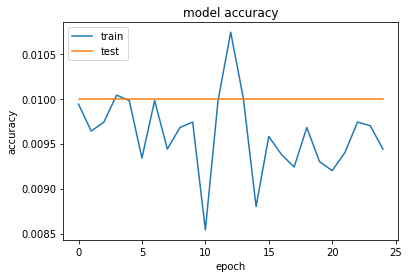

In [28]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
score = np.array(history.history['val_acc']).mean()*100

print("Accuracy of the model is",score)
train_score = np.array(history.history['acc']).mean()*100

print("Training Accuracy of the model is",train_score)

Accuracy of the model is 0.9999999776482582
Training Accuracy of the model is 0.9609599933028221
